In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
cars=pd.read_csv(r'C:\Users\wjaku\Downloads\Carsdata2.csv')

In [36]:
cars.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,Fuel_City,Fuel_Highway,Weight,Wheelbase,Length
0,Chevrolet,Aveo 4dr,Sedan,USA,Front,"$11,690","$10,965",1.6,4.0,103.0,11.0,8.0,2370.0,98.0,167.0
1,Chevrolet,Aveo LS 4dr hatch,Sedan,USA,Front,"$12,585","$11,802",1.6,4.0,103.0,11.0,8.0,2348.0,98.0,153.0
2,Ford,Focus LX 4dr,Sedan,USA,Front,"$13,730","$12,906",2.0,4.0,110.0,10.0,7.0,2606.0,103.0,168.0
3,Ford,Focus ZX3 2dr hatch,Sedan,USA,Front,"$13,270","$12,482",2.0,4.0,130.0,10.0,7.0,2612.0,103.0,168.0
4,Ford,Focus SE 4dr,Sedan,USA,Front,"$15,460","$14,496",2.0,4.0,130.0,10.0,7.0,2606.0,103.0,168.0


In [37]:
cars.isnull().sum()

Make            3
Model           3
Type            3
Origin          3
DriveTrain      3
MSRP            3
Invoice         3
EngineSize      3
Cylinders       5
Horsepower      3
Fuel_City       3
Fuel_Highway    3
Weight          3
Wheelbase       3
Length          3
dtype: int64

In [38]:
cars[cars.isnull().any(axis=1)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,Fuel_City,Fuel_Highway,Weight,Wheelbase,Length
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197.0,9.0,6.0,3053.0,106.0,174.0
294,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238.0,9.0,5.0,3029.0,106.0,174.0


In [39]:
cars['Cylinders'].fillna(cars['Cylinders']==2, inplace=True)

In [40]:
cars.dropna(subset=['Make'], inplace = True)

In [41]:
cars[cars.isnull().any(axis=1)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,Fuel_City,Fuel_Highway,Weight,Wheelbase,Length


In [42]:
#Dropping hybrid-type cars because there isn't enough data to provide a comprehensive analysis.
cars=cars[cars['Type']!='Hybrid']

In [43]:
cars['Type'].unique()

array(['Sedan', 'Wagon', 'SUV', 'Sports', 'Truck'], dtype=object)

In [44]:
cars.dtypes

Make             object
Model            object
Type             object
Origin           object
DriveTrain       object
MSRP             object
Invoice          object
EngineSize      float64
Cylinders        object
Horsepower      float64
Fuel_City       float64
Fuel_Highway    float64
Weight          float64
Wheelbase       float64
Length          float64
dtype: object

In [45]:
cars['MSRP'] = cars['MSRP'].str.replace('[\$\,]','', regex=True)
cars['Invoice'] = cars['Invoice'].str.replace('[\$\,]','', regex=True)

In [46]:
cars.head(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,Fuel_City,Fuel_Highway,Weight,Wheelbase,Length
0,Chevrolet,Aveo 4dr,Sedan,USA,Front,11690,10965,1.6,4.0,103.0,11.0,8.0,2370.0,98.0,167.0
1,Chevrolet,Aveo LS 4dr hatch,Sedan,USA,Front,12585,11802,1.6,4.0,103.0,11.0,8.0,2348.0,98.0,153.0
2,Ford,Focus LX 4dr,Sedan,USA,Front,13730,12906,2.0,4.0,110.0,10.0,7.0,2606.0,103.0,168.0


In [47]:
cars['MSRP'] = cars['MSRP'].astype(int)
cars['Invoice'] = cars['Invoice'].astype(int)

In [48]:
cars['Margin']=cars['MSRP']-cars['Invoice']

In [49]:
cars.sort_values(['Margin'], ascending=False).head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,Fuel_City,Fuel_Highway,Weight,Wheelbase,Length,Margin
426,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465,173560,3.6,6.0,477.0,18.0,13.0,3131.0,93.0,175.0,18905
394,Porsche,911 Carrera 4S coupe 2dr (convert),Sports,Europe,All,84165,72206,3.6,6.0,315.0,17.0,12.0,3240.0,93.0,175.0,11959
393,Porsche,911 Carrera convertible 2dr (coupe),Sports,Europe,Rear,79165,69229,3.6,6.0,315.0,17.0,12.0,3135.0,93.0,175.0,9936
358,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765,79978,3.2,6.0,290.0,16.0,11.0,3153.0,100.0,174.0,9787
395,Porsche,911 Targa coupe 2dr,Sports,Europe,Rear,76765,67128,3.6,6.0,315.0,18.0,13.0,3119.0,93.0,175.0,9637


In [50]:
max_margin=cars.groupby(['Make'])['Margin'].mean().round(0).sort_values( ascending= False).head(5)
display(max_margin)

Make
Porsche          9902.0
Jaguar           5482.0
Lexus            5455.0
Acura            4348.0
Mercedes-Benz    4204.0
Name: Margin, dtype: float64

Text(0.5, 1.0, 'Top 5 make by average margin')

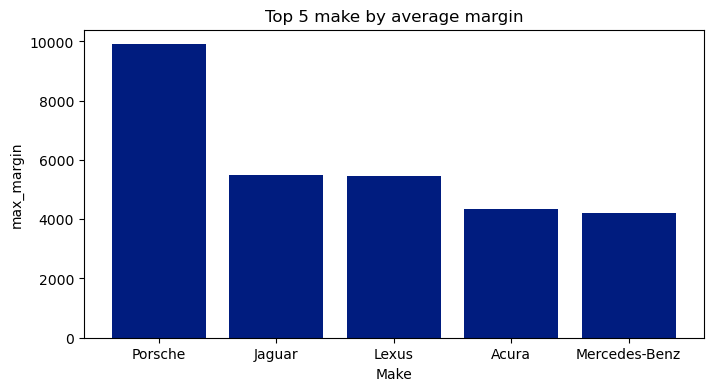

In [51]:
sns.set_palette("dark")
plt.bar(max_margin.index, max_margin.values)
plt.xlabel('Make')
plt.ylabel('max_margin')
plt.title('Top 5 make by average margin')

In [52]:
max_MSRP=cars.groupby(['Make'])['MSRP'].mean().round(0).sort_values(ascending= False)

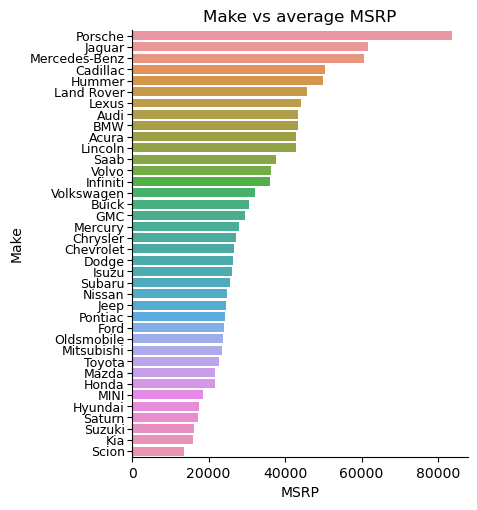

In [53]:
df = max_MSRP.to_frame().reset_index()
g = sns.catplot(data=df, x='MSRP', y="Make", kind="bar")
plt.title('Make vs average MSRP')
g.set_yticklabels(df['Make'].values, fontsize=9)
g.ax.tick_params(axis='y', pad=1.9)

Text(0.5, 1.0, 'MSRP vs Drive Train')

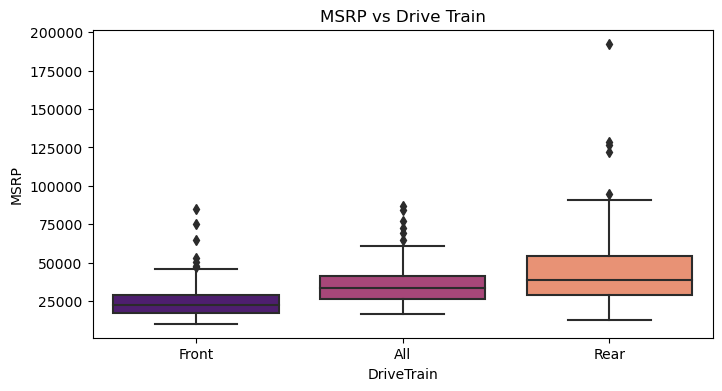

In [54]:
plt.rcParams['figure.figsize']=(8,4)
ax = sns.boxplot(x="DriveTrain", y="MSRP", data=cars, palette = 'magma')
plt.title('MSRP vs Drive Train')

Text(0.5, 1.0, 'MSRP vs Type')

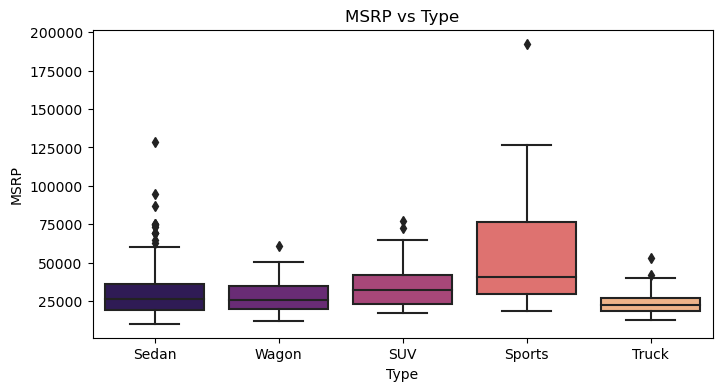

In [55]:
plt.rcParams['figure.figsize']=(8,4)
ax = sns.boxplot(x="Type", y="MSRP", data = cars, palette = 'magma')
plt.title('MSRP vs Type')

In [56]:
cars['Fuel_City']=cars['Fuel_City'].astype(int)
cars['Fuel_Highway']=cars['Fuel_Highway'].astype(int)

Text(0.5, 1.0, 'City fuel consumption vs Engine Size')

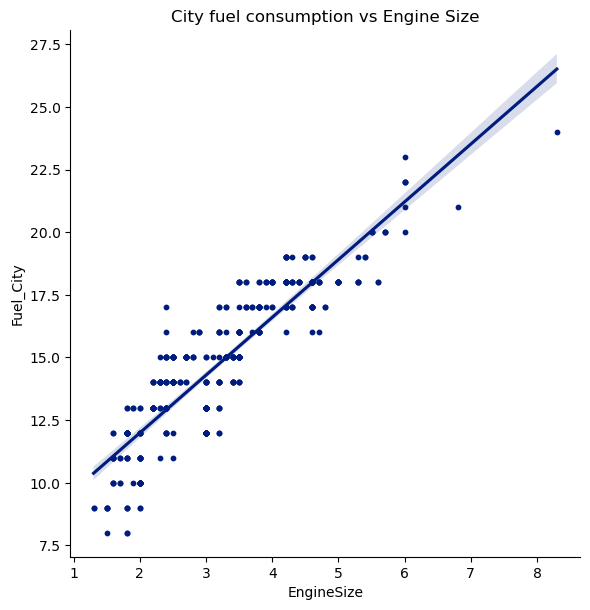

In [58]:
sns.lmplot(
    data=cars, x="EngineSize", y="Fuel_City", palette="muted",
    height=6, scatter_kws={"s": 10, "alpha": 1})
plt.title('City fuel consumption vs Engine Size')

Text(0.5, 1.0, 'Highway fuel consumption vs Engine Size')

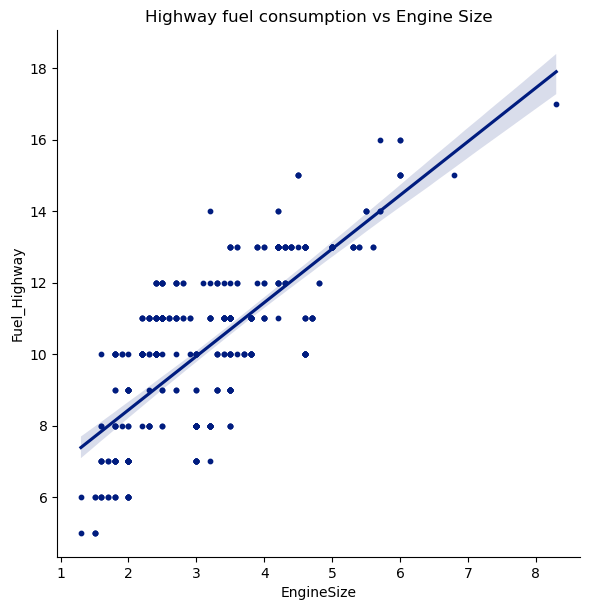

In [59]:
sns.lmplot(
    data=cars, x="EngineSize", y="Fuel_Highway", palette="muted",
    height=6, scatter_kws={"s": 10, "alpha": 1})
plt.title('Highway fuel consumption vs Engine Size')

Text(0.5, 1.0, 'Highway fuel consumption vs Horsepower')

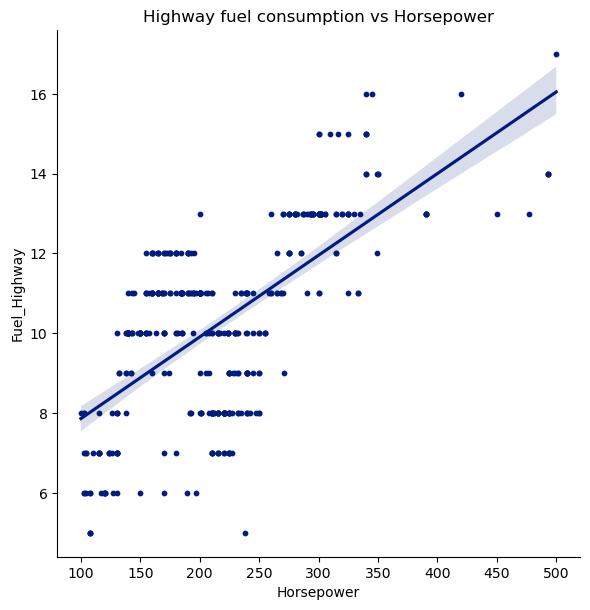

In [60]:
sns.lmplot(
    data=cars, x="Horsepower", y="Fuel_Highway", palette="muted",
    height=6, scatter_kws={"s": 10, "alpha": 1})
plt.title('Highway fuel consumption vs Horsepower')

Text(0.5, 1.0, 'City fuel consumption vs Horsepower')

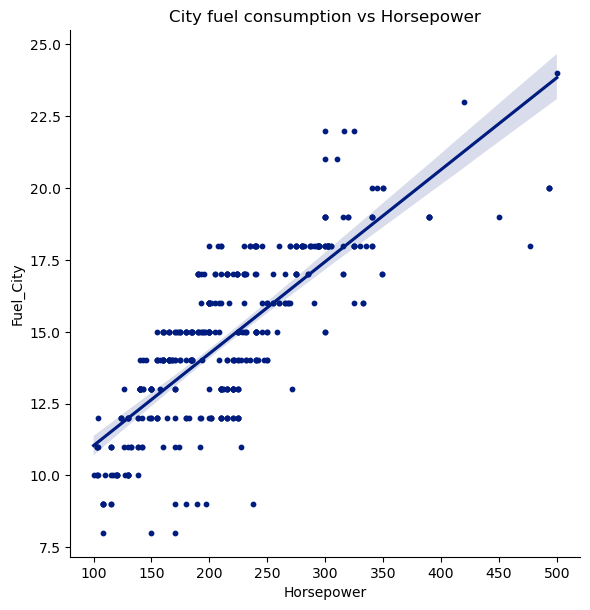

In [61]:
sns.lmplot(
    data=cars, x="Horsepower", y="Fuel_City", palette="muted",
    height=6, scatter_kws={"s": 10, "alpha": 1})
plt.title('City fuel consumption vs Horsepower')